<a href="https://colab.research.google.com/github/ArsalanSahab/Python_OpenCV_Image_Processing/blob/main/Image_Processing_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Muhammad Arsalan
ERP : 17881

In [165]:
# Importing Libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import urllib
from skimage import io

% matplotlib inline



In [ ]:
# Checking OpenCV

cv2.__version__

'4.4.0'

PART 1

In [ ]:
''' 

Why use Low Pass Filters ?

A LPF helps in removing noise, or blurring the image. 

What is image smooothing ?

Image Smoothing/Blurring of convolving and image with a LPF to remove noise.



'''

In [169]:
# Loading Images

url_1 = "https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F776%2F1*Lad06lrjlU9UZgSTHUoyfA.png&imgrefurl=https%3A%2F%2Fmedium.com%2F%40iHrishi_mane%2Fwhat-is-google-colab-eb1e718646ce&tbnid=mcJ8pcRcvj6eBM&vet=12ahUKEwjP0NzvnYntAhULixoKHXRSAMcQMygAegUIARCjAQ..i&docid=8Kx9udL7iU_XoM&w=776&h=343&q=google%20colab&client=safari&ved=2ahUKEwjP0NzvnYntAhULixoKHXRSAMcQMygAegUIARCjA"
url_2 = "https://drive.google.com/file/d/1mUc_9R4jX5urImZTPfotAPA6BqiPm3Di/view?usp=sharing"

image = io.imread(url_2,plugin='matplotlib')

image


UnidentifiedImageError: ignored

2D Filtering Sample # 1

In [164]:
# Applying a General/Custom Linear Filter, i.e 2D Filter.




# Load the image
img = image

# Setup the Kernel : Kernel is a XxY Matrix.
kernel = np.ones((4,7),np.float32)/35 #( Takes a subset of XxY , sums all values and devides by 25)
my_filtered_img = cv2.filter2D(img,-1,kernel)

# Plotting the Images Side by Side
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]) 
plt.yticks([])
plt.subplot(122)
plt.imshow(my_filtered_img)
plt.title('2D Filtered')
plt.xticks([])
plt.yticks([])
plt.show()

error: ignored

2D Filtering Sample # 2

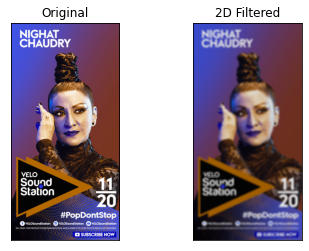

In [78]:
# Applying a General/Custom Linear Filter, i.e 2D Filter.

# Load the image
img = cv2.imread('test.png')

# Setup the Kernel : Kernel is a XxY Matrix.
kernel_2 = np.ones((7,7),np.float32)/55 #( Takes a subset of XxY , sums all values and devides by 55)
my_filtered_img = cv2.filter2D(img,-1,kernel_2)

# Plotting the Images Side by Side
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]) 
plt.yticks([])
plt.subplot(122)
plt.imshow(my_filtered_img)
plt.title('2D Filtered')
plt.xticks([])
plt.yticks([])
plt.show()

Findings From 2D Filtering :

Increasing the subset of pixels increases the brightness of the blur/filter while increases the divder lowers the brightness of the blur/filter.

Implementing The Two Step Plan

Gaussian Filter Sample # 1

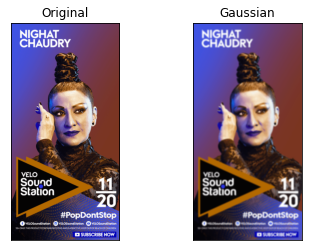

In [79]:
# Gaussian Filter/Blur

# Load the image
img = cv2.imread('test.png')

# Setup the Gaussian Kernel and Sigma.

gaussian_kernel_low_sigma = cv2.getGaussianKernel(ksize= 5, sigma= 2)
my_filtered_img = cv2.sepFilter2D(img,-1,gaussian_kernel_low_sigma,gaussian_kernel_low_sigma)

# Plotting the Images Side by Side
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(my_filtered_img)
plt.title('Gaussian')
plt.xticks([])
plt.yticks([])
plt.show()

Gaussian Filter Sample # 2

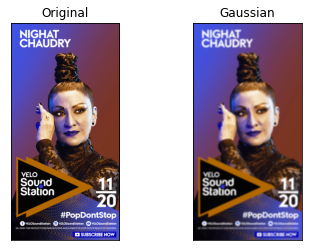

In [80]:
# Gaussian Filter/Blur

# Load the image
img = cv2.imread('test.png')

# Setup the Gaussian Kernel and Sigma.

gaussian_kernel_low_sigma = cv2.getGaussianKernel(ksize= 5, sigma= 15)
my_filtered_img = cv2.sepFilter2D(img,-1,gaussian_kernel_low_sigma,gaussian_kernel_low_sigma)

# Plotting the Images Side by Side
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(my_filtered_img)
plt.title('Gaussian')
plt.xticks([])
plt.yticks([])
plt.show()

Sobel HPF Sample # 1

"\nplt.subplot(122)\nplt.imshow(grad_y)\nplt.title('Gradient Applied on Y Axis')\nplt.xticks([])\nplt.yticks([]) "

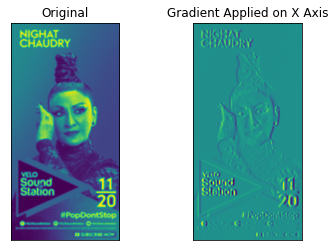

In [84]:

# Load the image
img = cv2.imread('test.png')


# Tranform Image to Grayscale
gray_img = cv2.cvtColor(my_filtered_img, cv2.COLOR_BGR2GRAY)

# Setting Up Gradients
grad_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)



# Plotting the Images Side by Side
plt.subplot(121)
plt.imshow(gray_img)
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(grad_x)
plt.title('Gradient Applied on X Axis')
plt.xticks([])
plt.yticks([])

'''
plt.subplot(122)
plt.imshow(grad_y)
plt.title('Gradient Applied on Y Axis')
plt.xticks([])
plt.yticks([]) '''


Sobel HPF Sample # 2

([], <a list of 0 Text major ticklabel objects>)

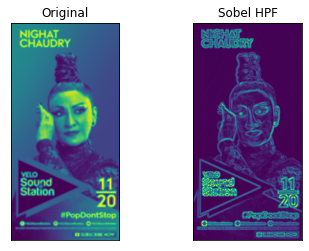

In [85]:
# Tranform Image to Grayscale
gray_img = cv2.cvtColor(my_filtered_img, cv2.COLOR_BGR2GRAY)



# Setting Up Sobel Kernel
grad_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

sobel_kernel = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Plotting the Images Side by Side
plt.subplot(121)
plt.imshow(gray_img)
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(sobel_kernel)
plt.title('Sobel HPF')
plt.xticks([])
plt.yticks([])




PART 2

Down Sampling

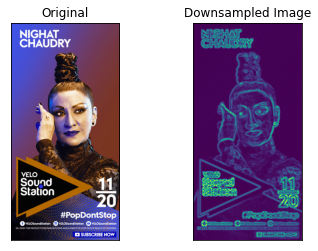

In [105]:
def apply_downsample_factor_2(image):

  # Downsampled Image with Sobel and Guassian Applied
  return cv2.resize(sobel_kernel,None,fx=2,fy=2)


down_sampled_img = apply_downsample_factor_2(sobel_kernel)




# Plotting the Images Side by Side
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]) 
plt.yticks([])
plt.subplot(122)
plt.imshow(down_sampled_img)
plt.title('Downsampled Image')
plt.xticks([])
plt.yticks([])
plt.show() 

Gaussian Pyramid

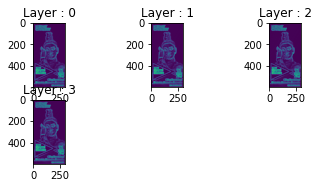

In [106]:
def gaussian_pyramid(sobel_img, levels) : 

    down_img = sobel_img
    for i in range(levels): 
        plt.subplot(3, 3, i + 1) 
      
        # Down Sample
        down_img = apply_downsample_factor_2(down_img)
        # using pyrDown() function 
        layer = cv2.pyrDown(down_img) 

        plt.title("Layer : " + str(i))
        plt.imshow(layer)



gaussian_pyramid(sobel_kernel.copy(), levels=4)

Blended Images Usign Gaussian and Laplace Pyramids

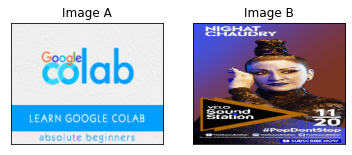

In [128]:
i = cv2.imread("colab.jpg")
i1 = cv2.imread("test.png")

i = cv2.resize(i, (250,200))
i1 = cv2.resize(i1, (250,200))


plt.subplot(121)
plt.imshow(i)
plt.title('Image A')
plt.xticks([]) 
plt.yticks([])
plt.subplot(122)
plt.imshow(i1)
plt.title('Image B')
plt.xticks([])
plt.yticks([])


def gauss_lap_blend_pyr(imageA, imageB) :


    # Generating Gaussian Pyramid for Image A
    imageA=imageA.copy()  
    gpA=[imageA]
    for i in range(4):
          imageA=cv2.pyrDown(imageA) 
          gpA.append(imageA) 

    # Generating Gaussian Pyramid for Image B
    imageB = imageB.copy()
    gpB=[imageB]
    for i1 in range(4):
            imageB=cv2.pyrDown(imageB)
            gpB.append(imageB)

    # Generating Laplacian Pyramid for Image A
    lpA = [gpA[3]]       
    for i in range(3, 0, -1): 
        size = (gpA[i - 1].shape[1],gpA[i - 1].shape[0]) 
        first_expanded = cv2.pyrUp(gpA[i], dstsize=size) 
        laplacian = cv2.subtract(gpA[i - 1], first_expanded) 
        lpA.append(laplacian)

    # Generating Laplacian Pyramid for Image B
    lpB= [gpB[3]]
    for i in range(3, 0, -1): 
        size = (gpB[i - 1].shape[1],gpB[i - 1].shape[0])  
        second_expanded = cv2.pyrUp(gpB[i], dstsize=size)
        laplacian = cv2.subtract(gpB[i - 1], second_expanded)
        lpB.append(laplacian)  

    # Reconstructing Images

    recon_list = []
    counter=0 
    for la,lb in zip(lpA,lpB): 
        rows,cols,ch = la.shape 
        counter=counter+1
        ls = np.hstack((la[:, :int(cols/2)], lb[:, int(cols/2):]))  
        recon_list.append(ls)   
    reconstructed_image = recon_list[0] 

    reconstructed_image = recon_list[0] 
    for i in range(1, 4):
        size = (recon_list[i].shape[1], recon_list[i].shape[0])
        reconstructed_image = cv2.pyrUp(reconstructed_image, dstsize=size)
        reconstructed_image = cv2.add(recon_list[i],reconstructed_image) 

   
    plt.imshow(reconstructed_image)   









Text(0.5, 1.0, 'Blended Image')

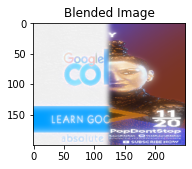

In [129]:
plt.subplot(121)
gauss_lap_blend_pyr(i,i1)
plt.title('Blended Image')



